# Convergence and asymptotic theory

*Importing of all necessary libraries and tuning some of the global settings.*

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats
from mpl_toolkits.mplot3d import Axes3D

In [2]:
matplotlib.rcParams['figure.figsize'] = [12, 6]
matplotlib.rc('font', family='Lato', size=16)

## Exercise 1

### Task 1.1
Generet a matrix $Y$ $(1000 \times 1)$ of random normal distribution with mean $2$ and a variance $4$. Suppose $Y_1 = 3(Y - 1)$. What is the distribution of $Y_1$? Plot its histogam.

First we define constants:

In [3]:
MEAN = 2
VARIANCE = 4
SAMPLE_SIZE = 1000

Then we generate random sample from the normal distribution:

*(Python's numpy library uses standard deviation instead of variance, thus the square root.)*

In [4]:
sample = np.random.normal(loc=MEAN, 
                          scale=VARIANCE ** 0.5, 
                          size=SAMPLE_SIZE)

We can then calculate the $Y_1$ random variable:

In [5]:
y_1 = 3 * (sample - 1)

Which should have normal distribution with mean equal $ 2 + 1 = 3$ and variation $4 \cdot 3^2 = 36$.

To visualise the result we will plot histogram of the $Y_1$ random variable with probability density function of random variable from $\mathcal{N}(3, 36)$ distribution to justify our statement.

In [6]:
# Definition of the pdf domain and values
x = np.linspace(min(y_1), max(y_1), num=SAMPLE_SIZE)
normal_pdf = scipy.stats.norm.pdf(x, 
                                  loc=MEAN + 1, 
                                  scale=(9 * VARIANCE) ** 0.5)

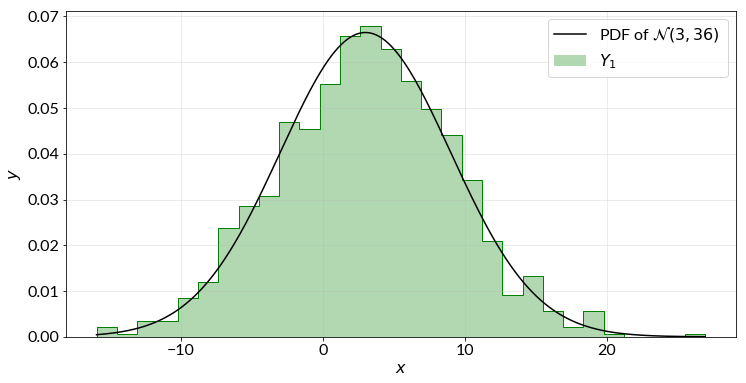

In [7]:
plt.grid(alpha=0.3)
plt.hist(y_1, bins=30, density=True, color='g', alpha=0.3, label='$Y_1$')
plt.hist(y_1, bins=30, density=True, color='g', histtype='step')
plt.plot(x, normal_pdf, 'k', label='PDF of $\mathcal{N}(3, 36)$ ')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()
plt.show()

### Task 1.2
Create variable $Y_2 = ((Y - 2) / 2)^2$. What is the distribution of $Y_2$? Let's plot its histogram.

In [8]:
y_2 = ((sample - 2) / 2) ** 2

We have that $(Y - 2) / 2 \sim \mathcal{N}(0, 1)$, therefore $Y_2$ if from the $\chi^2(1)$ distribution, which is by definition a sum of normalized random variables (the parameter $1$ reflects that we are only having one element in the sum).

To visualize it we generate a plot similar to previous one.

In [9]:
# Definition of the pdf domain and values
# (We have to remember to only have positive numbers in the domain)
x = np.linspace(max(0.08, min(y_1)), max(y_2), num=SAMPLE_SIZE)
chi2_pdf = scipy.stats.chi2.pdf(x, df=1)

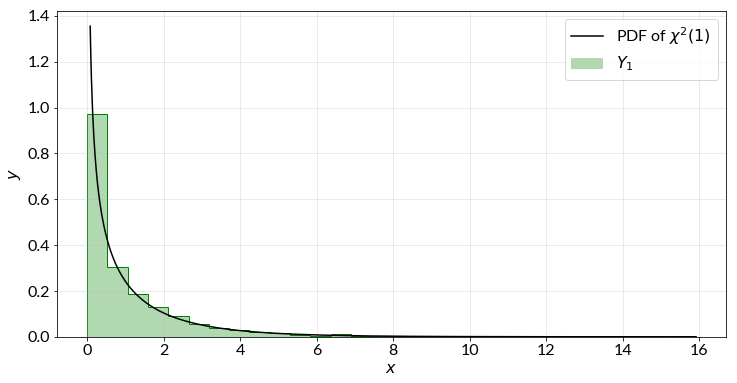

In [10]:
plt.grid(alpha=0.3)
plt.hist(y_2, bins=30, density=True, color='g', alpha=0.3, label='$Y_1$')
plt.hist(y_2, bins=30, density=True, color='g', histtype='step')
plt.plot(x, chi2_pdf, 'k', label='PDF of $\chi^2(1)$ ')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()
plt.show()

### Task 1.3
(Convergence of a mean and a variance)
Compute a sequence of means $m_n$ and a sequence of variance $\sigma_n^2$ for the variable $Y$, where
$$
m_n = \frac1n \sum_{i=1}^n Y_i
$$
$$
\sigma_n^2 = \frac1n \sum_{i=1}^n\left( Y_i - m_n \right) ^ 2
$$

Firstly we define range for the $n$

In [11]:
n = np.arange(1, 1000)

And then compute $m_n$ and $\sigma_n^2$

In [12]:
ys = [np.random.normal(loc=MEAN, scale=VARIANCE ** 0.5, size=size) for size in n]
m_n = [np.mean(y) for y in ys]
sigma2_n = [np.var(y) for y in ys]

And then visualize the sequences

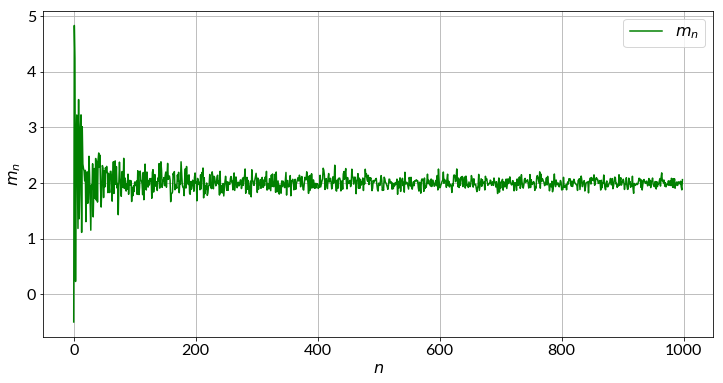

In [13]:
plt.grid()
plt.plot(m_n, 'g', label='$m_n$')
plt.xlabel('$n$')
plt.ylabel('$m_n$')
plt.legend()
plt.show()

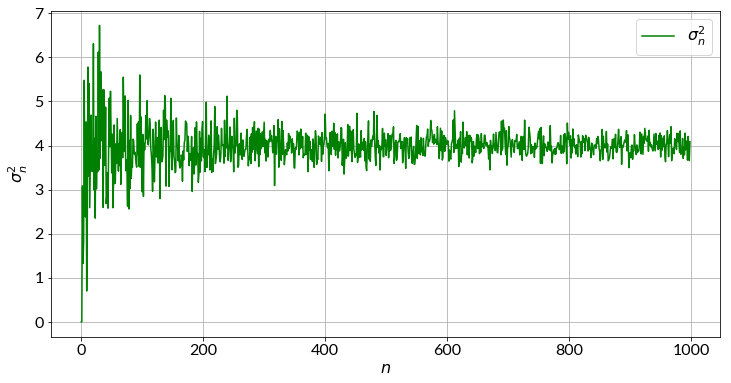

In [14]:
plt.grid()
plt.plot(sigma2_n, 'g', label='$\sigma_n^2$')
plt.xlabel('$n$')
plt.ylabel('$\sigma_n^2$')
plt.legend()
plt.show()

As we can see the sequences converge to $2$ and $4$ which are mean and variance respectively. Variablity of the sequences decreases as number of terms increases, which is especially visible in the first few values.

## Exercise 2

### Task 2.1
Simulate ($10^3$ times) a random variable $X \sim \mathcal{N}(0, I_2)$.

In [15]:
SIZE = 10 ** 3

In [16]:
x = np.random.multivariate_normal(mean=np.zeros(2), 
                                  cov=[[1, 0], [0, 1]], 
                                  size=SIZE)

To take a look if the obtained points resemble normal distribution we plot them on a plane and check if they are concetrated around point $(0, 0)$ and most of them lie in $[-3, 3] \times [-3, 3]$ square ([Three sigma rule](https://en.wikipedia.org/wiki/68%E2%80%9395%E2%80%9399.7_rule)).

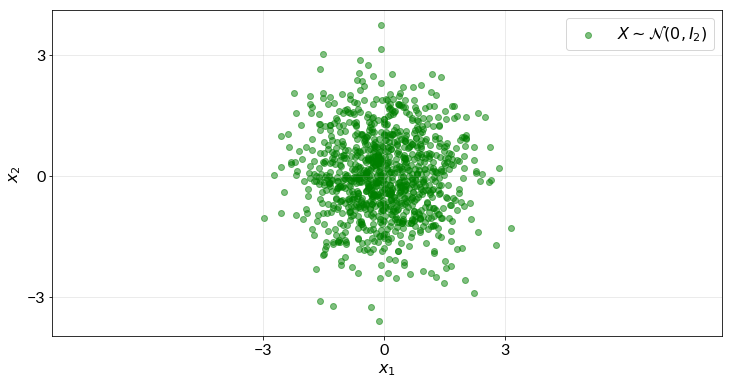

In [17]:
plt.scatter(x[:, 0], x[:, 1], color='g', alpha=0.5, 
            label='$X \sim \mathcal{N}(0, I_2)$')
plt.grid(alpha=0.3)
plt.axis('equal')
plt.xticks([-3, 0, 3])
plt.yticks([-3, 0, 3])
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.show()

### Task 2.2

Transform the variable $X$ into the variable $Y \sim \mathcal N(\mu, \Sigma)$: $\mu = [0, 1]'$ and

$$
\Sigma = 
\begin{bmatrix} 
2   & 0.5 \\
0.5 &   2 \\
\end{bmatrix}
\text{.}
$$

*Hint*: find a vector $a$ and a matrix $A$, such that $Y = AX + a$; use the property $Var(AX) = AVar(X)A'$.

We will firstly define all the constants:

In [18]:
mu = np.array([0, 1])
sigma = np.array([[2, 0.5], [0.5, 2]])

Now to the solution. We have that 
$$
\mathbf E X = 
\begin{bmatrix}
0 \\
0
\end{bmatrix}
$$

$$
\mathbf{Var} X = 
\begin{bmatrix}
1 & 0 \\
0 & 1
\end{bmatrix} \text .
$$

We can then calculate 
$$
\mu = \mathbf E Y = \mathbf E (AX + a) = A \mathbf E X + a = a
$$

and 
$$
\Sigma = \mathbf{Var} Y = \mathbf{Var}(AX + a) = A \mathbf{Var} (X) A' = 
A I_2 A' = A A'
$$


To find square root of $2 \times 2$ matrix we will use appropriate formula (see [Square root of a 2 by 2 matrix](https://en.wikipedia.org/wiki/Square_root_of_a_2_by_2_matrix)). In cases, where the matrix is bigger we can use Cholesky decomposion.

In [19]:
d = np.linalg.det(sigma)
s = np.sqrt(d)
tau = np.trace(sigma)
t = np.sqrt(tau + 2 * s)

In [20]:
A = 1 / t * (sigma + s * np.identity(2))

And with that we can simply obtain the $Y$ random variable.

In [21]:
y = np.dot(x, A) + mu

As done previously we can take a peek at it (with the samples from $X$ random variable in the background)

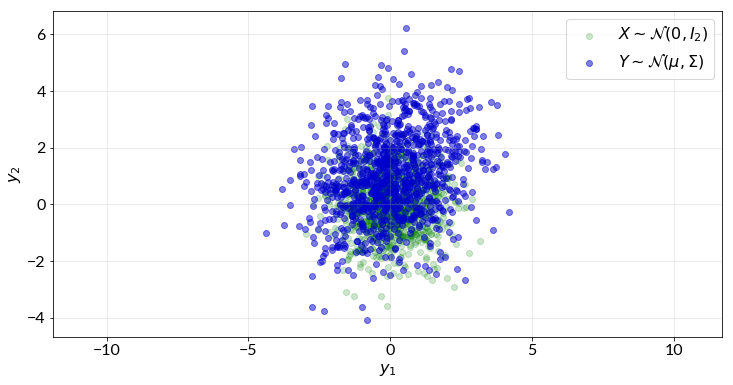

In [22]:
plt.scatter(x[:, 0], x[:, 1], color='g', alpha=0.2, 
            label='$X \sim \mathcal{N}(0, I_2)$')
plt.scatter(y[:, 0], y[:, 1], color='mediumblue', alpha=0.5, 
            label='$Y \sim \mathcal{N}(\mu, \Sigma)$')
plt.grid(alpha=0.3)
plt.axis('equal')
plt.xlabel('$y_1$')
plt.ylabel('$y_2$')
plt.legend()
plt.show()

We can see the slight shift of center into the $(0, 0.5)$ point (as indicated by the $\mu$ vector) and the delicate stretch introduced by the covariance matrix.

To further check the result we shall compute numerical mean and covariance

In [23]:
np.mean(y, axis=0)

array([0.01066633, 1.00987882])

In [24]:
np.cov(y.T)

array([[2.01764196, 0.4726613 ],
       [0.4726613 , 2.19789057]])

As we see the results are very close to the theoretical ones.

### Task 2.3

Plot the 3-D histogram with bars colored according to heigh and $30$ bins.

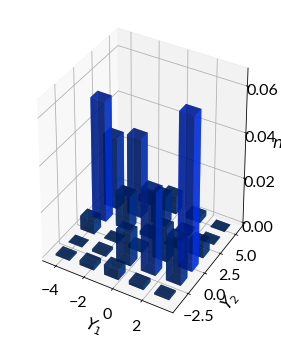

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
hist, xedges, yedges = np.histogram2d(y[:, 0], y[:, 1], bins=(5, 6), density=True)
hist = hist.ravel()
xpos, ypos = np.meshgrid(xedges[:-1], yedges[:-1])
xpos = xpos.ravel()
ypos = ypos.ravel()
colors = [(0, 0.2 , 0.5 + 0.5 * value / max(hist), 0.7) for value in hist]  # Defining the RGB values
ax.bar3d(xpos, ypos, 0, 1, 1, hist, 
         color=colors)
ax.set_xlabel('$Y_1$')
ax.set_ylabel('$Y_2$')
ax.set_zlabel('$n$')
ax.set_aspect('equal')
plt.show()

### Task 2.4

Transform the variable $Y$ into the variable $Z = (Y - \mu)'\Sigma^{-1}(Y - \mu)$. What is the distribution of the new variable? Plot its histogram.

Firstly we calculate the $\Sigma^{-1}$:

In [26]:
sigma_inv = np.linalg.inv(sigma)

In [27]:
sigma_inv

array([[ 0.53333333, -0.13333333],
       [-0.13333333,  0.53333333]])

And then the $(Y - \mu)$:

In [28]:
y_centered = y - mu

In [29]:
y_centered

array([[ 1.07026411, -1.15463414],
       [-0.50999801, -0.3991669 ],
       [-1.86942448, -3.14381991],
       ...,
       [ 0.53171315,  2.53172858],
       [-2.72090717, -1.05133717],
       [ 2.17048686, -1.28242452]])

Now we call calculate $Z$ random variable for each centered $Y$.

In [57]:
zs = []
for y in y_centered:
    zs.append(y.T @ sigma_inv @ y)

Using the theorem

> **Theorem 1** Let $X$ be a $K \times 1$ multivatiate normal random vector with mean $\mu$ and invertible covariance matrix $V$. Define
$$
Q = (X - \mu) ^ \intercal V^{-1} (X - \mu) \text{.}
$$
Then $Q$ has $\chi^2$ distribution with $K$ degrees of freedom.

we have that obtained random variables are from $\chi^2(2)$ distribution. 

To confirm our assumptions we plot their histogram with probability density function on top.

In [69]:
# Definition of the pdf domain and values
# (We have to remember to only have positive numbers in the domain)
x = np.linspace(max(0.08, min(zs)), max(zs), num=SAMPLE_SIZE)
chi2_pdf = scipy.stats.chi2.pdf(x, df=2)

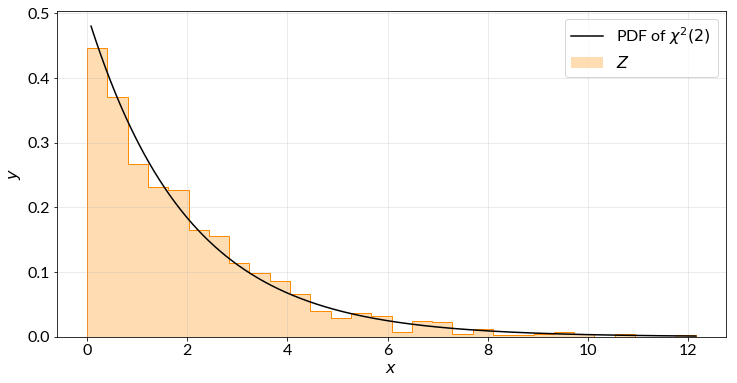

In [78]:
plt.grid(alpha=0.3)
plt.hist(zs, bins=30, density=True, color='darkorange', alpha=0.3, label='$Z$')
plt.hist(zs, bins=30, density=True, color='darkorange', histtype='step')
plt.plot(x, chi2_pdf, 'k', label='PDF of $\chi^2(2)$ ')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()
plt.show()

## Exercise 3

**Hint:** Looks like a delta method.

Let $\hat \beta$ be an estimator (a sequence of estimators) of a $(K \times 1)$ vector $\beta$, which is asymptotically normal with

$$
\sqrt N (\hat \beta - \beta) \rightarrow_d \mathcal N (0, \Sigma)
\text{.}
$$

### Task 3.1

If $R \ne 0$ is an $(M \times K)$ matrix, what is the asymptotic distribution of $\sqrt N (R \hat \beta - R \beta)$?

### Task 3.2

If $p \lim \hat A = A$, what is the asymptotic distribution of $\sqrt N \hat A (\hat \beta - \beta)$?

### Task 3.3

If $\Sigma$ is nonsingular and $p \lim \hat \Sigma = \Sigma$, prove that $N(\hat \beta - \beta)'\hat \Sigma^{-1} (\hat \beta - \beta) \rightarrow_d \chi^2(K)$.

In [36]:
x = np.random.normal(0, 1, 100)

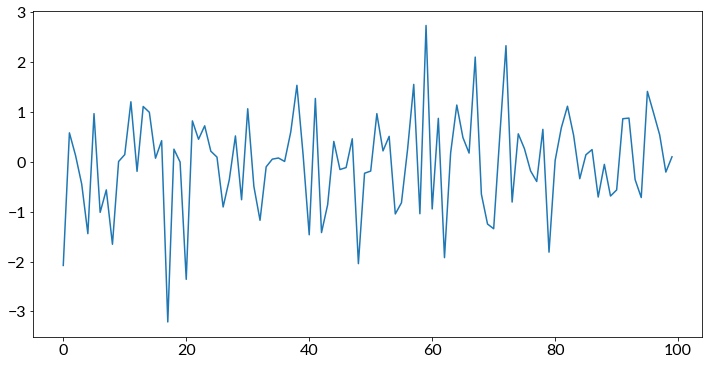

In [37]:
plt.plot(x)

In [38]:
np.var(3 * x)

9.041640223094879